# Emergency Room Visit Prediction Demo

This notebook demonstrates the Emergency Room Visit Predictor with Social Determinants of Health (SDOH) features.

## Key Features:
- Predicts likelihood of ER visits within 6 months
- Incorporates social determinants of health (SDOH)
- Uses past ER visit history as a strong predictor
- Provides actionable recommendations including social interventions

## 1. Import Libraries and Load the Predictor

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configure display settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')

# Import the ER visit predictor
from er_visit_predictor import ERVisitPredictor

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


## 2. Initialize the Predictor and Generate Synthetic Data

In [2]:
# Initialize the predictor
predictor = ERVisitPredictor()

# Generate synthetic data with SDOH features
print("Generating synthetic patient data...")
data = predictor.generate_synthetic_data(n_samples=5000)

print(f"\n✅ Generated {len(data)} patient records with {len(data.columns)} features")
print(f"\nER Visit Distribution:")
print(data['er_visit'].value_counts())
print(f"\nER Visit Rate: {data['er_visit'].mean():.2%}")

Generating synthetic patient data...

✅ Generated 5000 patient records with 26 features

ER Visit Distribution:
er_visit
0    3750
1    1250
Name: count, dtype: int64

ER Visit Rate: 25.00%


## 3. Explore the Data

In [3]:
# Display first few rows
print("Sample Patient Data:")
print("="*80)
data.head()

Sample Patient Data:


,age,gender,bmi,blood_pressure_systolic,blood_pressure_diastolic,heart_rate,chronic_conditions,medication_count,recent_hospitalizations,past_er_visits,past_er_visits_6m,insurance_type,income_level,education_level,employment_status,housing_status,transportation_access,food_security,social_support,neighborhood_safety,healthcare_access,smoking_status,exercise_frequency,stress_level,mental_health_status,er_visit
0,59,Male,21.369197,165,69,80,None,0,0,0,1,Medicare,Low,Bachelor's,Employed,Rent,Personal Vehicle,Mildly Insecure,Moderate,Very Safe,Fair,Never,Rare,Low,Mild,0
1,47,Male,23.721554,166,87,50,Kidney Disease,3,0,2,2,Medicare,High,Less than High School,Employed,Own Home,Personal Vehicle,Food Secure,Moderate,Safe,Fair,Never,Occasional,Medium,None,1
2,62,Male,25.306556,118,78,104,"Diabetes,Hypertension",3,0,0,2,Medicare,Medium,Less than High School,Retired,Own Home,Public Transport,Mildly Insecure,Moderate,Moderate,Good,Never,Never,High,None,0
3,80,Male,33.304646,135,73,79,None,0,0,0,0,Medicare,Medium,Bachelor's,Employed,Own Home,No Reliable Transport,Food Secure,Strong,Moderate,Good,Never,Regular,High,None,0
4,45,Male,20.022366,101,83,85,None,2,2,5,1,Private,High,Bachelor's,Employed,Own Home,Personal Vehicle,Food Secure,Strong,Moderate,Excellent,Never,Rare,Medium,None,0


In [4]:
# Display data types and columns
print("Data Features Overview:")
print("="*80)
print("\nMedical Features:")
medical_cols = ['age', 'bmi', 'blood_pressure_systolic', 'blood_pressure_diastolic', 
                'heart_rate', 'chronic_conditions', 'medication_count', 'recent_hospitalizations']
print(data[medical_cols].info())

print("\nPast ER Visit Features:")
er_cols = ['past_er_visits', 'past_er_visits_6m']
print(data[er_cols].describe())

print("\nSocial Determinants of Health (SDOH):")
sdoh_cols = ['income_level', 'education_level', 'employment_status', 'housing_status',
             'transportation_access', 'food_security', 'social_support', 'neighborhood_safety']
for col in sdoh_cols:
    print(f"\n{col}:")
    print(data[col].value_counts())

Data Features Overview:

Medical Features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   int64  
 1   bmi                       5000 non-null   float64
 2   blood_pressure_systolic   5000 non-null   int64  
 3   blood_pressure_diastolic  5000 non-null   int64  
 4   heart_rate                5000 non-null   int64  
 5   chronic_conditions        5000 non-null   object 
 6   medication_count          5000 non-null   int64  
 7   recent_hospitalizations   5000 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 312.6+ KB
None

Past ER Visit Features:
       past_er_visits  past_er_visits_6m
count     5000.000000        5000.000000
mean         1.207600           0.500200
std          1.102699           0.696058
min          0.000000           0.000000
25

## 4. Data Visualization

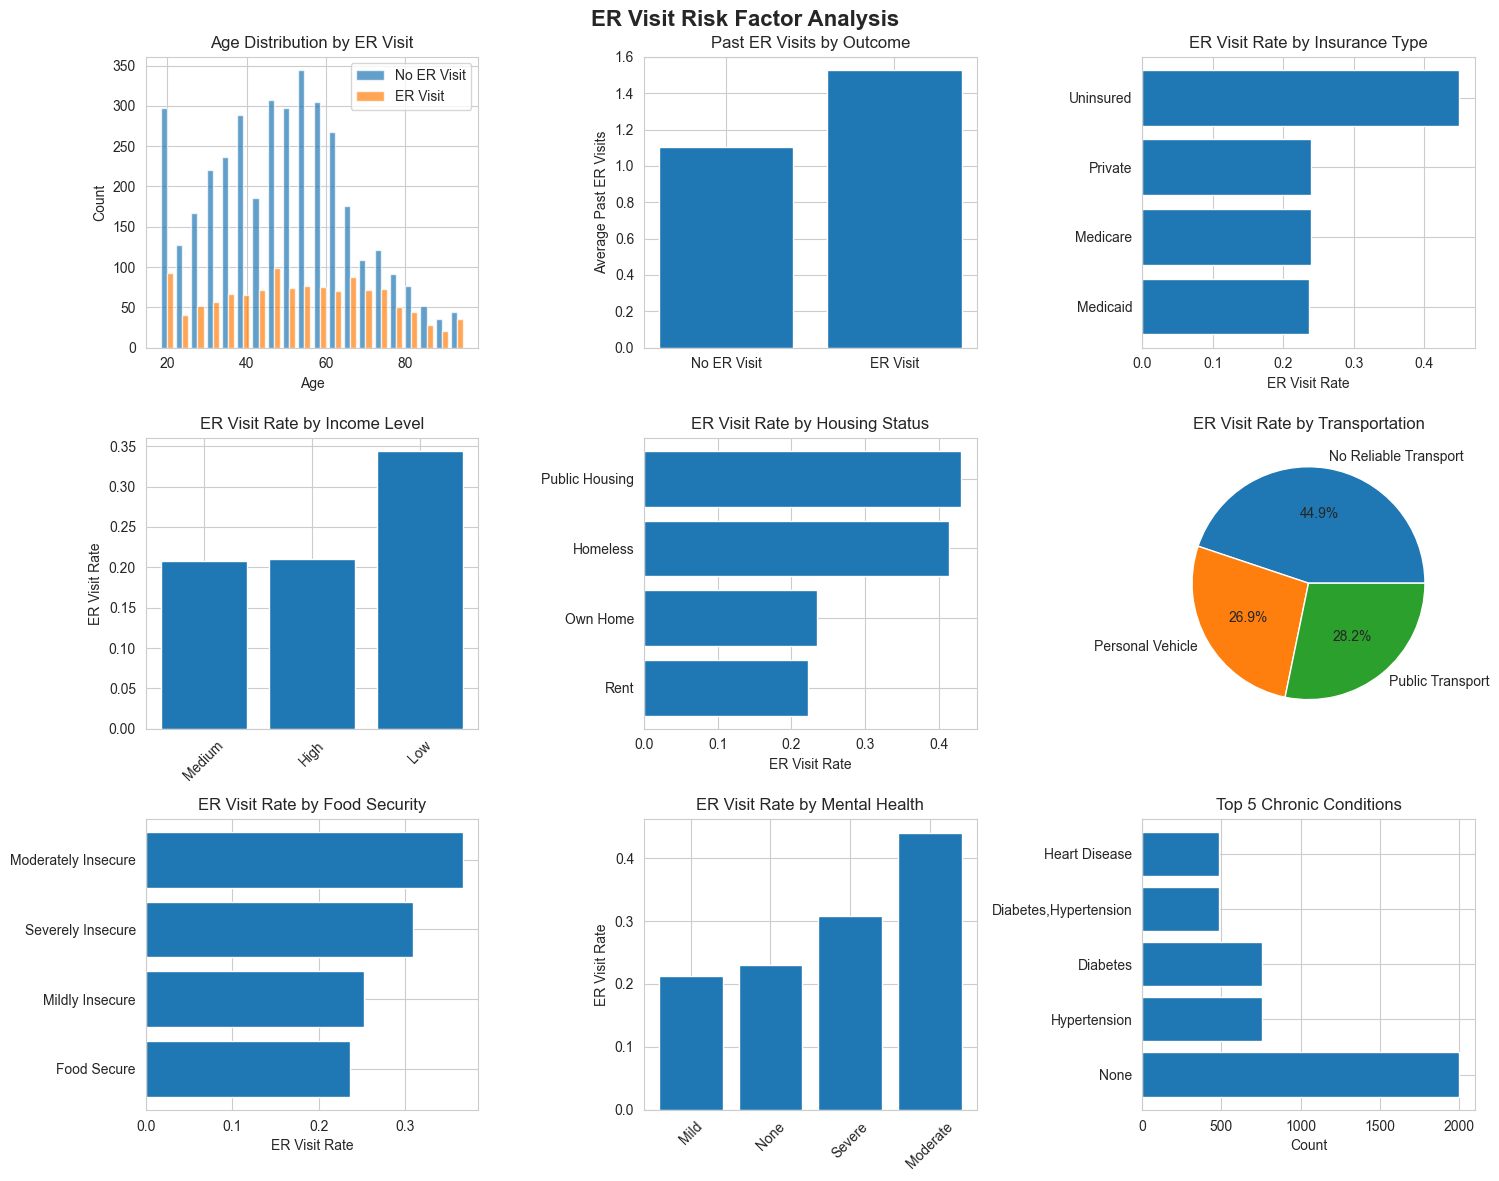

In [5]:
# Create visualization dashboard
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('ER Visit Risk Factor Analysis', fontsize=16, fontweight='bold')

# Age distribution by ER visit
axes[0, 0].hist([data[data['er_visit']==0]['age'], data[data['er_visit']==1]['age']], 
                label=['No ER Visit', 'ER Visit'], bins=20, alpha=0.7)
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Age Distribution by ER Visit')
axes[0, 0].legend()

# Past ER visits distribution
axes[0, 1].bar(['No ER Visit', 'ER Visit'], 
               [data[data['er_visit']==0]['past_er_visits'].mean(),
                data[data['er_visit']==1]['past_er_visits'].mean()])
axes[0, 1].set_ylabel('Average Past ER Visits')
axes[0, 1].set_title('Past ER Visits by Outcome')

# Insurance type distribution
insurance_er = data.groupby('insurance_type')['er_visit'].mean().sort_values()
axes[0, 2].barh(insurance_er.index, insurance_er.values)
axes[0, 2].set_xlabel('ER Visit Rate')
axes[0, 2].set_title('ER Visit Rate by Insurance Type')

# Income level impact
income_er = data.groupby('income_level')['er_visit'].mean().sort_values()
axes[1, 0].bar(income_er.index, income_er.values)
axes[1, 0].set_ylabel('ER Visit Rate')
axes[1, 0].set_title('ER Visit Rate by Income Level')
axes[1, 0].tick_params(axis='x', rotation=45)

# Housing status impact
housing_er = data.groupby('housing_status')['er_visit'].mean().sort_values()
axes[1, 1].barh(housing_er.index, housing_er.values)
axes[1, 1].set_xlabel('ER Visit Rate')
axes[1, 1].set_title('ER Visit Rate by Housing Status')

# Transportation access impact
transport_er = data.groupby('transportation_access')['er_visit'].mean()
axes[1, 2].pie(transport_er.values, labels=transport_er.index, autopct='%1.1f%%')
axes[1, 2].set_title('ER Visit Rate by Transportation')

# Food security impact
food_er = data.groupby('food_security')['er_visit'].mean().sort_values()
axes[2, 0].barh(food_er.index, food_er.values)
axes[2, 0].set_xlabel('ER Visit Rate')
axes[2, 0].set_title('ER Visit Rate by Food Security')

# Mental health status impact
mental_er = data.groupby('mental_health_status')['er_visit'].mean().sort_values()
axes[2, 1].bar(mental_er.index, mental_er.values)
axes[2, 1].set_ylabel('ER Visit Rate')
axes[2, 1].set_title('ER Visit Rate by Mental Health')
axes[2, 1].tick_params(axis='x', rotation=45)

# Chronic conditions distribution
chronic_counts = data['chronic_conditions'].value_counts().head(5)
axes[2, 2].barh(chronic_counts.index, chronic_counts.values)
axes[2, 2].set_xlabel('Count')
axes[2, 2].set_title('Top 5 Chronic Conditions')

plt.tight_layout()
plt.show()

## 5. Preprocess Data and Train Models

In [6]:
# Preprocess the data
print("Preprocessing data...")
X, y = predictor.preprocess_data(data)

print(f"\n✅ Features prepared: {X.shape}")
print(f"Target variable distribution:")
print(y.value_counts())

# Show feature engineering results
print("\nEngineered features (sample):")
engineered_cols = ['socioeconomic_risk', 'access_risk', 'social_risk', 'mental_health_risk', 
                   'frequent_er_user', 'recent_er_user']
for col in engineered_cols:
    if col in X.columns:
        print(f"  {col}: min={X[col].min()}, max={X[col].max()}, mean={X[col].mean():.2f}")

Preprocessing data...

✅ Features prepared: (5000, 36)
Target variable distribution:
er_visit
0    3750
1    1250
Name: count, dtype: int64

Engineered features (sample):
  socioeconomic_risk: min=0, max=4, mean=0.92
  access_risk: min=0, max=3, mean=0.40
  social_risk: min=0, max=3, mean=0.40
  mental_health_risk: min=0, max=2, mean=0.36
  frequent_er_user: min=0, max=1, mean=0.12
  recent_er_user: min=0, max=1, mean=0.40


In [7]:
# Train multiple models
print("Training machine learning models...")
print("="*50)
results, (X_test, y_test) = predictor.train_models(X, y)

# Display results comparison
print("\n" + "="*50)
print("Model Performance Comparison:")
print("="*50)
performance_df = pd.DataFrame({
    'Model': results.keys(),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'AUC Score': [results[m]['auc'] for m in results.keys()]
})
performance_df = performance_df.sort_values('AUC Score', ascending=False)
print(performance_df.to_string(index=False))

best_model_name = performance_df.iloc[0]['Model']
print(f"\n🏆 Best Model: {best_model_name}")

Training machine learning models...
Training Random Forest...
Random Forest - Accuracy: 0.9090, AUC: 0.9648
Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.9280, AUC: 0.9803
Training Logistic Regression...
Logistic Regression - Accuracy: 0.9070, AUC: 0.9592
Training SVM...
SVM - Accuracy: 0.9190, AUC: 0.9665

Model Performance Comparison:
              Model  Accuracy  AUC Score
  Gradient Boosting     0.928   0.980309
                SVM     0.919   0.966533
      Random Forest     0.909   0.964789
Logistic Regression     0.907   0.959211

🏆 Best Model: Gradient Boosting


## 6. Detailed Model Evaluation


Best Model (Gradient Boosting) Detailed Evaluation:
Accuracy: 0.9280
AUC: 0.9803
Sensitivity (Recall): 0.7600
Specificity: 0.9840

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       750
           1       0.94      0.76      0.84       250

    accuracy                           0.93      1000
   macro avg       0.93      0.87      0.90      1000
weighted avg       0.93      0.93      0.93      1000



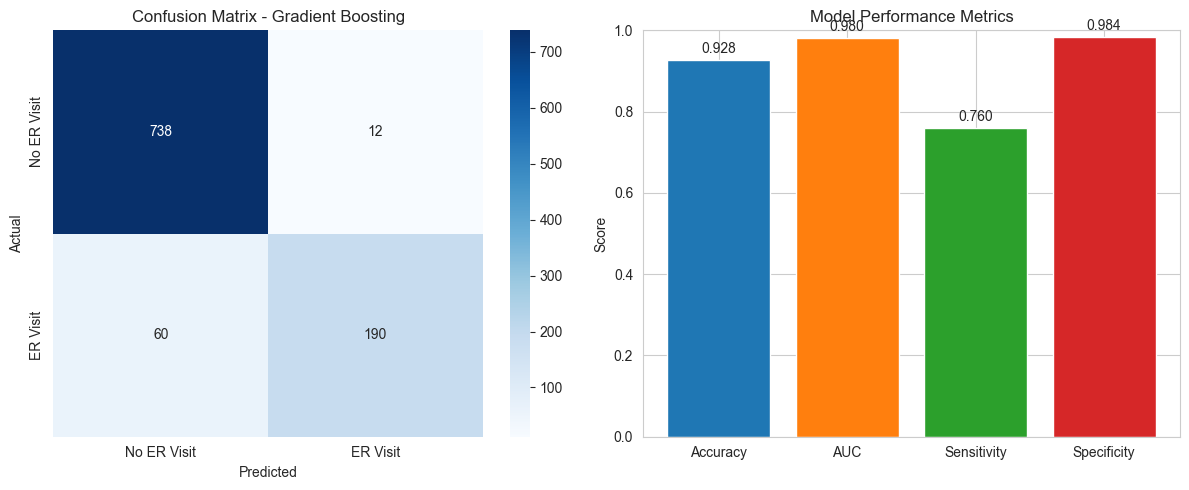

In [8]:
# Evaluate the best model
evaluation = predictor.evaluate_model(X_test, y_test, model_name=f"Best Model ({best_model_name})")

# Visualize confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
cm = evaluation['confusion_matrix']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
           xticklabels=['No ER Visit', 'ER Visit'],
           yticklabels=['No ER Visit', 'ER Visit'])
axes[0].set_title(f'Confusion Matrix - {best_model_name}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Performance metrics bar plot
metrics = ['Accuracy', 'AUC', 'Sensitivity', 'Specificity']
values = [evaluation['accuracy'], evaluation['auc'], 
          evaluation['sensitivity'], evaluation['specificity']]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bars = axes[1].bar(metrics, values, color=colors)
axes[1].set_ylim(0, 1)
axes[1].set_ylabel('Score')
axes[1].set_title('Model Performance Metrics')

# Add value labels on bars
for bar, value in zip(bars, values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 7. Model Performance Visualization

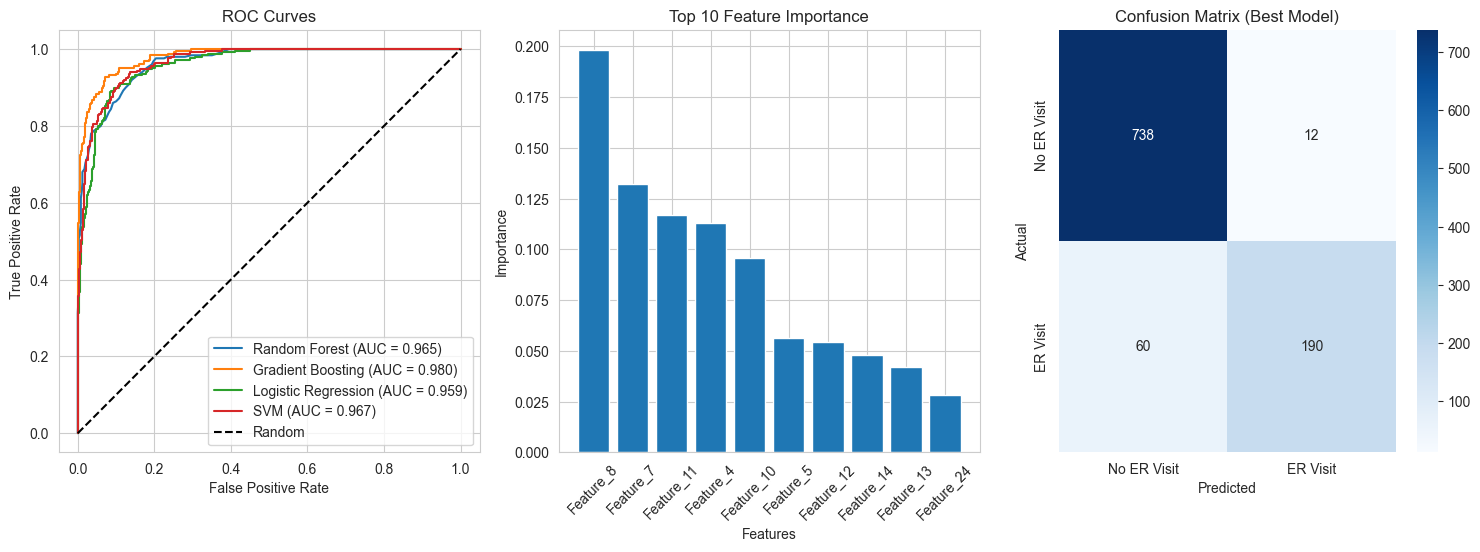

In [9]:
# Generate comprehensive performance plots
predictor.plot_results(X_test, y_test)

## 8. Individual Patient Risk Prediction - Example Cases

In [10]:
# Example 1: High-risk patient with multiple SDOH challenges
high_risk_patient = {
    'age': 68,
    'gender': 'Female',
    'bmi': 32,
    'blood_pressure_systolic': 155,
    'blood_pressure_diastolic': 95,
    'heart_rate': 88,
    'chronic_conditions': 'Diabetes,Hypertension',
    'medication_count': 7,
    'recent_hospitalizations': 2,
    'past_er_visits': 4,
    'past_er_visits_6m': 2,
    'insurance_type': 'Medicaid',
    'income_level': 'Low',
    'education_level': 'High School',
    'employment_status': 'Disabled',
    'housing_status': 'Public Housing',
    'transportation_access': 'No Reliable Transport',
    'food_security': 'Moderately Insecure',
    'social_support': 'Weak',
    'neighborhood_safety': 'Unsafe',
    'healthcare_access': 'Poor',
    'smoking_status': 'Current',
    'exercise_frequency': 'Never',
    'stress_level': 'High',
    'mental_health_status': 'Moderate'
}

print("="*80)
print("HIGH-RISK PATIENT PROFILE")
print("="*80)
print(f"Age: {high_risk_patient['age']}, Gender: {high_risk_patient['gender']}")
print(f"Chronic Conditions: {high_risk_patient['chronic_conditions']}")
print(f"Past ER Visits (total): {high_risk_patient['past_er_visits']}")
print(f"Past ER Visits (6 months): {high_risk_patient['past_er_visits_6m']}")
print(f"Income Level: {high_risk_patient['income_level']}")
print(f"Housing: {high_risk_patient['housing_status']}")
print(f"Transportation: {high_risk_patient['transportation_access']}")

# Make prediction
prediction = predictor.predict_er_visit(high_risk_patient)

print("\n" + "="*80)
print("PREDICTION RESULTS")
print("="*80)
print(f"ER Visit Probability: {prediction['er_visit_probability']:.1%}")
print(f"Risk Level: {prediction['risk_level']}")
print(f"Prediction: {'Will likely visit ER' if prediction['er_visit_prediction'] else 'Unlikely to visit ER'}")

print("\n" + "="*80)
print("RECOMMENDATIONS")
print("="*80)
for i, rec in enumerate(prediction['recommendations'], 1):
    print(f"{i}. {rec}")

HIGH-RISK PATIENT PROFILE
Age: 68, Gender: Female
Chronic Conditions: Diabetes,Hypertension
Past ER Visits (total): 4
Past ER Visits (6 months): 2
Income Level: Low
Housing: Public Housing
Transportation: No Reliable Transport

PREDICTION RESULTS
ER Visit Probability: 100.0%
Risk Level: High
Prediction: Will likely visit ER

RECOMMENDATIONS
1. Schedule follow-up appointment within 1 week
2. Monitor vital signs daily
3. Consider preventive care interventions
4. Review medication compliance
5. Consider care coordination program for frequent ER users
6. Connect with social services for financial assistance
7. Refer to housing assistance programs
8. Arrange transportation assistance for medical appointments
9. Connect with food assistance programs
10. Consider social work referral for support services
11. Refer to mental health services


In [11]:
# Example 2: Low-risk patient with good SDOH factors
low_risk_patient = {
    'age': 35,
    'gender': 'Male',
    'bmi': 24,
    'blood_pressure_systolic': 120,
    'blood_pressure_diastolic': 75,
    'heart_rate': 68,
    'chronic_conditions': 'None',
    'medication_count': 0,
    'recent_hospitalizations': 0,
    'past_er_visits': 0,
    'past_er_visits_6m': 0,
    'insurance_type': 'Private',
    'income_level': 'High',
    'education_level': 'Bachelor\'s',
    'employment_status': 'Employed',
    'housing_status': 'Own Home',
    'transportation_access': 'Personal Vehicle',
    'food_security': 'Food Secure',
    'social_support': 'Strong',
    'neighborhood_safety': 'Very Safe',
    'healthcare_access': 'Excellent',
    'smoking_status': 'Never',
    'exercise_frequency': 'Regular',
    'stress_level': 'Low',
    'mental_health_status': 'None'
}

print("="*80)
print("LOW-RISK PATIENT PROFILE")
print("="*80)
print(f"Age: {low_risk_patient['age']}, Gender: {low_risk_patient['gender']}")
print(f"Chronic Conditions: {low_risk_patient['chronic_conditions']}")
print(f"Past ER Visits: {low_risk_patient['past_er_visits']}")
print(f"Income Level: {low_risk_patient['income_level']}")
print(f"Housing: {low_risk_patient['housing_status']}")
print(f"Healthcare Access: {low_risk_patient['healthcare_access']}")

# Make prediction
prediction = predictor.predict_er_visit(low_risk_patient)

print("\n" + "="*80)
print("PREDICTION RESULTS")
print("="*80)
print(f"ER Visit Probability: {prediction['er_visit_probability']:.1%}")
print(f"Risk Level: {prediction['risk_level']}")
print(f"Prediction: {'Will likely visit ER' if prediction['er_visit_prediction'] else 'Unlikely to visit ER'}")

print("\n" + "="*80)
print("RECOMMENDATIONS")
print("="*80)
for i, rec in enumerate(prediction['recommendations'], 1):
    print(f"{i}. {rec}")

LOW-RISK PATIENT PROFILE
Age: 35, Gender: Male
Chronic Conditions: None
Past ER Visits: 0
Income Level: High
Housing: Own Home
Healthcare Access: Excellent

PREDICTION RESULTS
ER Visit Probability: 0.2%
Risk Level: Low
Prediction: Unlikely to visit ER

RECOMMENDATIONS
1. Continue routine care
2. Schedule annual check-up
3. Maintain healthy lifestyle


In [12]:
# Example 3: Medium-risk patient - Elderly with some SDOH challenges
medium_risk_patient = {
    'age': 72,
    'gender': 'Female',
    'bmi': 28,
    'blood_pressure_systolic': 135,
    'blood_pressure_diastolic': 82,
    'heart_rate': 75,
    'chronic_conditions': 'Hypertension',
    'medication_count': 3,
    'recent_hospitalizations': 0,
    'past_er_visits': 1,
    'past_er_visits_6m': 0,
    'insurance_type': 'Medicare',
    'income_level': 'Medium',
    'education_level': 'Some College',
    'employment_status': 'Retired',
    'housing_status': 'Own Home',
    'transportation_access': 'Public Transport',
    'food_security': 'Food Secure',
    'social_support': 'Moderate',
    'neighborhood_safety': 'Safe',
    'healthcare_access': 'Good',
    'smoking_status': 'Former',
    'exercise_frequency': 'Occasional',
    'stress_level': 'Medium',
    'mental_health_status': 'Mild'
}

print("="*80)
print("MEDIUM-RISK PATIENT PROFILE")
print("="*80)
print(f"Age: {medium_risk_patient['age']}, Gender: {medium_risk_patient['gender']}")
print(f"Chronic Conditions: {medium_risk_patient['chronic_conditions']}")
print(f"Past ER Visits: {medium_risk_patient['past_er_visits']}")
print(f"Social Support: {medium_risk_patient['social_support']}")
print(f"Transportation: {medium_risk_patient['transportation_access']}")

# Make prediction
prediction = predictor.predict_er_visit(medium_risk_patient)

print("\n" + "="*80)
print("PREDICTION RESULTS")
print("="*80)
print(f"ER Visit Probability: {prediction['er_visit_probability']:.1%}")
print(f"Risk Level: {prediction['risk_level']}")
print(f"Prediction: {'Will likely visit ER' if prediction['er_visit_prediction'] else 'Unlikely to visit ER'}")

print("\n" + "="*80)
print("RECOMMENDATIONS")
print("="*80)
for i, rec in enumerate(prediction['recommendations'], 1):
    print(f"{i}. {rec}")

MEDIUM-RISK PATIENT PROFILE
Age: 72, Gender: Female
Chronic Conditions: Hypertension
Past ER Visits: 1
Social Support: Moderate
Transportation: Public Transport

PREDICTION RESULTS
ER Visit Probability: 1.9%
Risk Level: Low
Prediction: Unlikely to visit ER

RECOMMENDATIONS
1. Continue routine care
2. Schedule annual check-up
3. Maintain healthy lifestyle


## 9. Batch Prediction on Test Set

Batch Prediction Results:
Total Patients: 100

Risk Level Distribution:
risk_level
Low       70
Medium    15
High      15
Name: count, dtype: int64

Average Probability by Risk Level:
risk_level
High      0.844569
Low       0.091010
Medium    0.439886
Name: predicted_probability, dtype: float64


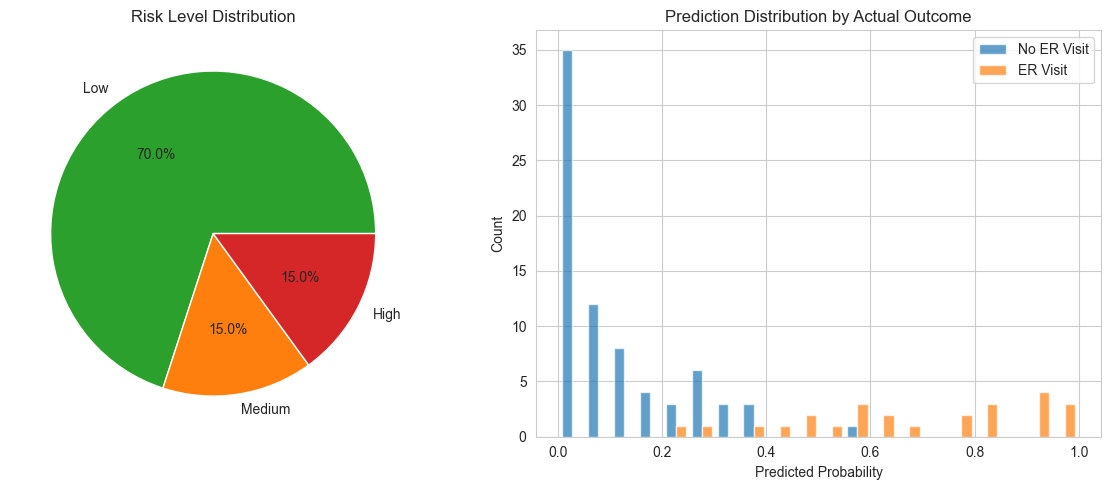

In [13]:
# Generate a small test dataset for batch prediction
test_data = predictor.generate_synthetic_data(n_samples=100)

# Make predictions for all test patients
predictions = []
for idx, row in test_data.iterrows():
    patient_dict = row.to_dict()
    pred = predictor.predict_er_visit(patient_dict)
    predictions.append({
        'patient_id': idx,
        'actual_er_visit': row['er_visit'],
        'predicted_probability': pred['er_visit_probability'],
        'risk_level': pred['risk_level']
    })

# Convert to DataFrame for analysis
predictions_df = pd.DataFrame(predictions)

print("Batch Prediction Results:")
print("="*80)
print(f"Total Patients: {len(predictions_df)}")
print("\nRisk Level Distribution:")
print(predictions_df['risk_level'].value_counts())
print("\nAverage Probability by Risk Level:")
print(predictions_df.groupby('risk_level')['predicted_probability'].mean())

# Visualize predictions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Risk level distribution
risk_counts = predictions_df['risk_level'].value_counts()
colors = {'Low': '#2ca02c', 'Medium': '#ff7f0e', 'High': '#d62728'}
axes[0].pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%',
           colors=[colors[x] for x in risk_counts.index])
axes[0].set_title('Risk Level Distribution')

# Probability distribution by actual outcome
axes[1].hist([predictions_df[predictions_df['actual_er_visit']==0]['predicted_probability'],
              predictions_df[predictions_df['actual_er_visit']==1]['predicted_probability']],
            label=['No ER Visit', 'ER Visit'], bins=20, alpha=0.7)
axes[1].set_xlabel('Predicted Probability')
axes[1].set_ylabel('Count')
axes[1].set_title('Prediction Distribution by Actual Outcome')
axes[1].legend()

plt.tight_layout()
plt.show()

## 10. Feature Importance Analysis

In [ ]:
# Get feature importance if available (for tree-based models)
if hasattr(predictor.best_model, 'feature_importances_'):
    # Get selected features
    selected_features = predictor.feature_selector.get_support()
    feature_names = X.columns[selected_features]
    
    # Get importance scores
    importance_scores = predictor.best_model.feature_importances_
    
    # Create DataFrame and sort
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance_scores
    }).sort_values('Importance', ascending=False).head(20)
    
    # Plot feature importance
    plt.figure(figsize=(10, 8))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance Score')
    plt.title(f'Top 20 Most Important Features ({best_model_name})')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Most Important Features:")
    print("="*80)
    for idx, row in importance_df.head(10).iterrows():
        print(f"{row['Feature']:40} {row['Importance']:.4f}")
else:
    print("Feature importance not available for the selected model type.")

## 11. Summary and Key Insights

In [14]:
print("="*80)
print("EMERGENCY ROOM VISIT PREDICTOR - SUMMARY")
print("="*80)

print("\n📊 MODEL PERFORMANCE:")
print(f"  - Best Model: {best_model_name}")
print(f"  - Accuracy: {evaluation['accuracy']:.2%}")
print(f"  - AUC Score: {evaluation['auc']:.3f}")
print(f"  - Sensitivity: {evaluation['sensitivity']:.2%}")
print(f"  - Specificity: {evaluation['specificity']:.2%}")

print("\n🔑 KEY FEATURES:")
print("  Medical Factors:")
print("    • Past ER visit history")
print("    • Chronic conditions")
print("    • Recent hospitalizations")
print("    • Medication count")
print("    • Vital signs (BP, heart rate, BMI)")

print("\n  Social Determinants of Health (SDOH):")
print("    • Income and employment status")
print("    • Housing stability")
print("    • Transportation access")
print("    • Food security")
print("    • Social support networks")
print("    • Healthcare access")
print("    • Mental health status")

print("\n💡 KEY INSIGHTS:")
print("  1. Past ER visits are strong predictors of future visits")
print("  2. Social determinants significantly impact ER utilization")
print("  3. Combining medical and social factors improves prediction accuracy")
print("  4. Early intervention based on risk level can prevent ER visits")
print("  5. Addressing SDOH factors is crucial for reducing ER burden")

print("\n🎯 PRACTICAL APPLICATIONS:")
print("  • Risk stratification for care management")
print("  • Proactive intervention for high-risk patients")
print("  • Resource allocation and planning")
print("  • Social service referrals based on SDOH needs")
print("  • Preventive care program enrollment")

print("\n" + "="*80)
print("✅ Demo completed successfully!")

EMERGENCY ROOM VISIT PREDICTOR - SUMMARY

📊 MODEL PERFORMANCE:
  - Best Model: Gradient Boosting
  - Accuracy: 92.80%
  - AUC Score: 0.980
  - Sensitivity: 76.00%
  - Specificity: 98.40%

🔑 KEY FEATURES:
  Medical Factors:
    • Past ER visit history
    • Chronic conditions
    • Recent hospitalizations
    • Medication count
    • Vital signs (BP, heart rate, BMI)

  Social Determinants of Health (SDOH):
    • Income and employment status
    • Housing stability
    • Transportation access
    • Food security
    • Social support networks
    • Healthcare access
    • Mental health status

💡 KEY INSIGHTS:
  1. Past ER visits are strong predictors of future visits
  2. Social determinants significantly impact ER utilization
  3. Combining medical and social factors improves prediction accuracy
  4. Early intervention based on risk level can prevent ER visits
  5. Addressing SDOH factors is crucial for reducing ER burden

🎯 PRACTICAL APPLICATIONS:
  • Risk stratification for care manag